# ANÁLISIS USUARIOS DE MANTENIMIENTO

# GRUPO 2

In [ ]:
# Los datos se han obtenido del portal público de información de la Empresa Municipal de Transportes de Madrid

In [289]:
# En este documento se hace un análisis principalmente de los movimientos de BiciMAD de los user_type = 3, que son
# los trabajadores de BiciMAD

# CARGA Y LECTURA DE DATOS

In [1]:
#Librerías a utilizar
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df_UsoFeb = pd.read_json('BiciMAD_movements_2020_1_6/202002_movements.json', lines=True)
df_UsoEne = pd.read_json('BiciMAD_movements_2020_1_6/202001_movements.json', lines=True)
df_UsoMar = pd.read_json('BiciMAD_movements_2020_1_6/202003_movements.json', lines=True)
df_UsoAbr = pd.read_json('BiciMAD_movements_2020_1_6/202004_movements.json', lines=True)
df_UsoMay = pd.read_json('BiciMAD_movements_2020_1_6/202005_movements.json', lines=True)
df_UsoJun = pd.read_json('BiciMAD_movements_2020_1_6/202006_movements.json', lines=True)
df_UsoDic = pd.read_json('BiciMAD_movements_2019_7_12/201912_movements.json', lines=True)
df_UsoNov = pd.read_json('BiciMAD_movements_2019_7_12/201911_movements.json', lines=True)
df_UsoOct = pd.read_json('BiciMAD_movements_2019_7_12/201910_movements.json', lines=True)
df_UsoSep = pd.read_json('BiciMAD_movements_2019_7_12/201909_movements.json', lines=True)
df_UsoAgo = pd.read_json('BiciMAD_movements_2019_7_12/201908_movements.json', lines=True)
df_UsoJul = pd.read_json('BiciMAD_movements_2019_7_12/201907_movements.json', lines=True)

In [3]:
df_UsoJul.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,{'$oid': '5ee862cecc8c1e839b419387'},509e6a72b7673f533912bf647d20df19305b848fbc1b89...,5,1,20,154,44,5,40,2019-07-01T00:00:00Z,28007
1,{'$oid': '5ee862cecc8c1e839b41938c'},90069a1194c3eb9e6faecaaf4eefb7209e890c0df5aeac...,8,1,17,184,57,4,129,2019-07-01T00:00:00Z,28045
2,{'$oid': '5ee862cecc8c1e839b419394'},b0ecaab6a35b7ea44d118f851f7fad5c2237e7dd51b337...,15,1,16,282,53,4,43,2019-07-01T00:00:00Z,
3,{'$oid': '5ee862cecc8c1e839b41939e'},5e1b8a8c4603ee8ac4f06aba12ff51e2c5dd105b6e5193...,18,1,18,388,56,0,13,2019-07-01T00:00:00Z,
4,{'$oid': '5ee862cecc8c1e839b4193a5'},80974c4043db61721399c43f296ce1db4436c7f107f8fc...,1,1,20,254,105,0,75,2019-07-01T00:00:00Z,


In [4]:
df_UsoJul.columns

Index(['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base',
       'travel_time', 'idunplug_station', 'ageRange', 'idplug_station',
       'unplug_hourTime', 'zip_code'],
      dtype='object')

In [5]:
df_UsoEne19 = pd.read_csv('DATOS/201901_movements.csv', sep=';')
df_UsoFeb19 = pd.read_csv('DATOS/201902_movements.csv', sep=';')
df_UsoMar19 = pd.read_csv('DATOS/201903_movements.csv', sep=';')
df_UsoAbr19 = pd.read_csv('DATOS/201904_movements.csv', sep=';')
df_UsoMay19 = pd.read_csv('DATOS/201905_movements.csv', sep=';')
df_UsoJun19 = pd.read_csv('DATOS/201906_movements.csv', sep=';')

# CREACIÓN Y ANÁLISIS DEL DATAFRAME DE MOVIMIENTOS USER3

In [6]:
df_old = pd.concat([df_UsoEne19, df_UsoFeb19, df_UsoMar19, df_UsoAbr19, df_UsoMay19, df_UsoJun19])

In [7]:
df_old.columns

Index(['_id.$oid', 'ageRange', 'idplug_base', 'idplug_station',
       'idunplug_base', 'idunplug_station', 'travel_time',
       'unplug_hourTime.$date', 'user_day_code', 'user_type', 'zip_code'],
      dtype='object')

In [8]:
df_old = df_old.rename(columns={"_id.$oid":"_id", "unplug_hourTime.$date":"unplug_hourTime"})

In [9]:
cols = ['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base', 'travel_time', 
        'idunplug_station', 'ageRange', 'idplug_station', 'unplug_hourTime', 'zip_code']
df_old = df_old[cols]
df_old.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,5c4b07ea2f38432e007daab8,b3b5b61509ab89afbf4d1e589d229bebe6637c2de819f5...,14,1,23,162,82,0,83,2019-01-01T00:00:00Z,NaN
1,5c4b07ea2f38432e007daaba,a18550d468153bb8e1808d4f0a85955579951832772996...,10,1,1,415,133,5,36,2019-01-01T00:00:00Z,28005
2,5c4b07ea2f38432e007daabb,905737396c2fe343c84d62eaee3ab66e19632638c5bea7...,5,1,3,545,25,0,90,2019-01-01T00:00:00Z,NaN
3,5c4b07ea2f38432e007daabe,ed1c1a22c120e7d42cc522c33ab41db549791f3914b273...,4,1,12,448,51,4,44,2019-01-01T00:00:00Z,28005
4,5c4b07ea2f38432e007daac0,c7d4e8f50d4a318e4f9fb08d4b715dc9015be1f415358b...,17,1,4,639,44,0,125,2019-01-01T00:00:00Z,NaN


In [10]:
df_old["zip_code"] = df_old["zip_code"].fillna(0)

In [11]:
df_full = pd.concat([df_old, df_UsoJul, df_UsoAgo, df_UsoSep, df_UsoOct, df_UsoNov, df_UsoDic, df_UsoEne, 
                     df_UsoFeb, df_UsoMar, df_UsoAbr, df_UsoMay, df_UsoJun], 
                   axis=0, ignore_index=True, sort=False)

In [12]:
df_full.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,5c4b07ea2f38432e007daab8,b3b5b61509ab89afbf4d1e589d229bebe6637c2de819f5...,14,1,23,162,82,0,83,2019-01-01T00:00:00Z,0
1,5c4b07ea2f38432e007daaba,a18550d468153bb8e1808d4f0a85955579951832772996...,10,1,1,415,133,5,36,2019-01-01T00:00:00Z,28005
2,5c4b07ea2f38432e007daabb,905737396c2fe343c84d62eaee3ab66e19632638c5bea7...,5,1,3,545,25,0,90,2019-01-01T00:00:00Z,0
3,5c4b07ea2f38432e007daabe,ed1c1a22c120e7d42cc522c33ab41db549791f3914b273...,4,1,12,448,51,4,44,2019-01-01T00:00:00Z,28005
4,5c4b07ea2f38432e007daac0,c7d4e8f50d4a318e4f9fb08d4b715dc9015be1f415358b...,17,1,4,639,44,0,125,2019-01-01T00:00:00Z,0


In [14]:
# Se convierten algunas variables a tipo string
df_full._id = df_full._id.astype(str)
df_full.user_day_code = df_full.user_day_code.astype(str)

In [15]:
# Se utiliza LabelEncoder para transformar las variables "_id" y "user_day_code"
transf = LabelEncoder()
df_full._id = transf.fit_transform(df_full._id)
df_full.user_day_code = transf.fit_transform(df_full.user_day_code)

In [16]:
# Se sustituyen los valores de "zip_code" en blanco por 0
df_full["zip_code"] = df_full["zip_code"].replace([''], 0)
df_full["zip_code"].value_counts()

0        2578584
28005     261307
28012     214184
28007     199694
28004     194399
          ...   
01011          1
3293           1
3680           1
28709          1
03005          1
Name: zip_code, Length: 747, dtype: int64

In [17]:
# Observamos si existen registros con valores negativos en la variable "travel_time"
df_full[df_full.travel_time < 0].shape

(72, 11)

In [18]:
# Como hay registros con valores negativos y tienen una proporción muy baja, se eliminan
df_full["travel_time"].loc[df_full["travel_time"] < 0] = 0

C:\Users\adria\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
# La variable fecha se covierte a datetime
df_full["time"] = pd.to_datetime(df_full["unplug_hourTime"], utc=True)

In [20]:
# Y se generan nuevas variables que puedan aportar más información: hour, day, week-day, month, year
df_full.loc[:, "hour"] = df_full.loc[:, "time"].dt.hour
df_full.loc[:, "day"] = df_full.loc[:, "time"].dt.day
df_full.loc[:, "wday"] = df_full.loc[:, "time"].dt.weekday
df_full.loc[:, "month"] = df_full.loc[:, "time"].dt.month
df_full.loc[:, "year"] = df_full.loc[:, "time"].dt.year

In [21]:
df_full.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,time,hour,day,wday,month,year
0,0,1962435,14,1,23,162,82,0,83,2019-01-01T00:00:00Z,0,2019-01-01 00:00:00+00:00,0,1,1,1,2019
1,1,1763458,10,1,1,415,133,5,36,2019-01-01T00:00:00Z,28005,2019-01-01 00:00:00+00:00,0,1,1,1,2019
2,2,1575571,5,1,3,545,25,0,90,2019-01-01T00:00:00Z,0,2019-01-01 00:00:00+00:00,0,1,1,1,2019
3,3,2589037,4,1,12,448,51,4,44,2019-01-01T00:00:00Z,28005,2019-01-01 00:00:00+00:00,0,1,1,1,2019
4,4,2181468,17,1,4,639,44,0,125,2019-01-01T00:00:00Z,0,2019-01-01 00:00:00+00:00,0,1,1,1,2019


In [22]:
# Se comprueba que ya no hay valores NA
df_full.isna().sum()

_id                 0
user_day_code       0
idplug_base         0
user_type           0
idunplug_base       0
travel_time         0
idunplug_station    0
ageRange            0
idplug_station      0
unplug_hourTime     0
zip_code            0
time                0
hour                0
day                 0
wday                0
month               0
year                0
dtype: int64

# ANÁLISIS DE LOS DATOS

In [ ]:
# A continuación se va a presentar un análisis con el objetivo de obtener, a partir de los movimientos de los user_type = 3, 
# es decir, los usuarios de mantenimiento, algunos patrones y claves sobre el mantenimiento del servicio de BiciMAD.

In [23]:
# Se comprueba el rango temporal del conjunto de datos
print(df_full.unplug_hourTime.min())
print(df_full.unplug_hourTime.max())

2019-01-01T00:00:00Z
2020-06-15T21:00:00Z


In [24]:
# Se comprueba cómo se distribuyen los movimientos por tipo de usuario
df_full["user_type"].value_counts()

1    4659590
3     349020
2      53576
0       1323
Name: user_type, dtype: int64

In [25]:
# Elimino los registros de user_type = 0, pues se trata de un volumen marginal que no tiene clasificación.
df_full = df_full[df_full["user_type"]!=0]

C:\Users\adria\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


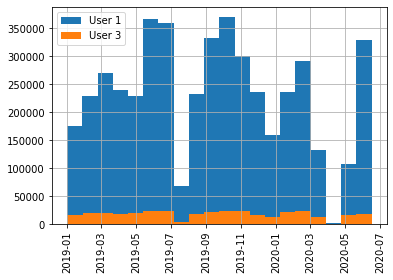

In [26]:
df_full[df_full["user_type"]==1]["time"].hist(bins=20)
df_full[df_full["user_type"]==3]["time"].hist(bins=20)
plt.legend(["User 1", "User 3"])
plt.xticks(rotation=90)
plt.show()
# Se puede apreciar que los viajes de los usuarios de mantenimiento, aunque muy inferiores, parecen más estables que los de
# los usuarios 1 (o usuarios estándar)

In [27]:
# Creo un conjunto de datos solamente con los movimientos de los usuario de estándar "User 1"
df_u1 = df_full[(df_full["user_type"] == 1) & (df_full["travel_time"] > 60)]
# Creo un conjunto de datos solamente con los movimientos de los usuario de mantenimiento "User 3"
df_u3 = df_full[df_full["user_type"] == 3]

In [28]:
df_u3.shape

(349020, 17)

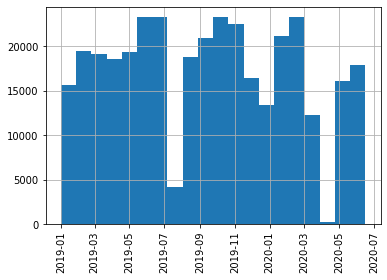

year  month
2019  1        19038
      2        19925
      3        22480
      4        19511
      5        27300
      6        26109
      7         7802
      8        21652
      9        24945
      10       27484
      11       21667
      12       16476
2020  1        22693
      2        25238
      3        12570
      4         2120
      5        21565
      6        10445
Name: _id, dtype: int64
La media de movimientos por mes es 19390.0


In [29]:
# Evolución del número de viajes (total usuario) y debajo muestro los datos en número
df_u3.time.hist(bins=20)
plt.xticks(rotation=90)
plt.show()
print(df_u3.groupby(["year", "month"])["_id"].count())
# Los meses con mayor número número de movimientos en el período analizado son: Mayo, Junio y Octubre; los meses con menos
# movimientos son Julio 2019 y Abril 2020, éste último debido a la crisis sanitaria.
moves = df_u3.groupby(["year", "month"])["_id"].count()
print("La media de movimientos por mes es", moves.mean())
# Vemos que la media de movimeintos mensual está en torno a 20.000

In [30]:
# Con la desviación estándar, podemos ver que el número mensual de viajes de los usuarios de mantenimiento es mucho más estable 
# que el de los usuarios 1 (o usuarios estándar)
print(df_u3.groupby(["year", "month"])["_id"].count().std())
print(df_u1.groupby(["year", "month"])["_id"].count().std())

7036.665186093231
106768.09536348276


In [31]:
# Se saca una distribución de todos los movimientos por rangos de tiempo
print("Proporción de viajes de más de 21.600 segundos:", len(df_u3[df_u3["travel_time"] > 21600]) / len(df_u3) * 100)
print("Proporción de viajes de menos de 21.600 segundos y más de 3.600 segundos:", len(df_u3[(df_u3["travel_time"] < 21600) & 
                                                                   (df_u3["travel_time"] > 3600)]) / len(df_u3) * 100)
print("Proporción de viajes de menos de 3.600 segundos y más de 1.200 segundos:", len(df_u3[(df_u3["travel_time"] < 3600) &
                                                                                             (df_u3["travel_time"] > 1200)]) / 
                                                                                              len(df_u3) * 100)
print("Proporción de viajes de menos de 1.200 segundos y más de 60 segundos:", len(df_u3[(df_u3["travel_time"] < 1200) & 
                                                                                             (df_u3["travel_time"] > 60)]) / 
                                                                                              len(df_u3) * 100)
print("Proporción de viajes de menos de 60 segundos:", len(df_u3[df_u3["travel_time"] < 60]) / len(df_u3) * 100)

Proporción de viajes de más de 21.600 segundos: 0.9182854850724887
Proporción de viajes de menos de 21.600 segundos y más de 3.600 segundos: 18.92527648845338
Proporción de viajes de menos de 3.600 segundos y más de 1.200 segundos: 41.651767807002464
Proporción de viajes de menos de 1.200 segundos y más de 60 segundos: 13.344507478081486
Proporción de viajes de menos de 60 segundos: 25.111168414417513


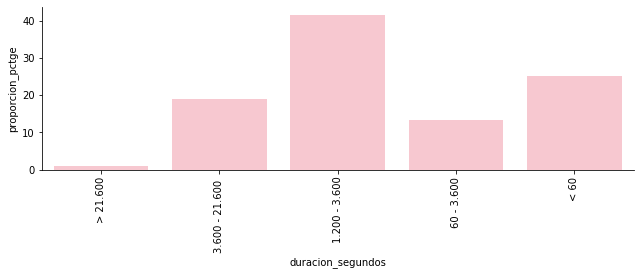

In [169]:
# Gráfico para visualizar mejor las proporciones anteriores
time_prop = [["> 21.600", 0.92], ["3.600 - 21.600 ", 18.92], 
       ["1.200 - 3.600", 41.65], ["60 - 3.600", 13.34],
       ["< 60", 25.11]]
df_time_prop = pd.DataFrame(time_prop, columns=["duracion_segundos", "proporcion_pctge"])
sns.catplot(data= df_time_prop, x="duracion_segundos", y="proporcion_pctge", kind="bar", color='pink', height= 3, aspect=3)
plt.xticks(rotation=90)
plt.show()
# Se observa que los movimientos de más de 21.600 segundos (6h) apenas tienen peso... El 41% de los movimientos tiene una
# duración media de entre 30 y 60 minutos.

In [32]:
print(df_u3.travel_time.mean())
print(df_u1.travel_time.mean())
# El tiempo medio de los movimientos en los usuarios de mantenimiento es mucho mayor que en los usuarios estándar, lo que 
# tiene sentido. Además, es posible que lleven bicicletas para reparar, etc. lo que conlleva que travel_time registre valores
# muy elevados.

8824.564420377055
929.3199988752606


In [33]:
# Se crea una base con los user 3 en la que eliminamos los viajes de más de 6h, debido a que tienen una representatividad
# muy baja, pero producen una fuerte desviación en la media de "travel_time"
df_u3_filtrada = df_u3[df_u3["travel_time"] < 21600 ]

In [34]:
# Si miramos el tiempo medio de la base filtrada, vemos que baja mucho, porque hemos eliminado los movimientos que distorsionan
# esta variable, de todos modos sigue siendo muy superior a la duración de los user 1
print(df_u3_filtrada.travel_time.mean())

2102.6207336292528


In [35]:
# Se dimensiona el número de empleados de BiciMAD que realizan movimientos diariamente:
empleados = df_full[(df_full["user_type"]==3)].groupby(["year", "month", "day"])["user_day_code"].unique().reset_index()
empleados["time"] = empleados["year"].map(str) + '-' + empleados["month"].map(str) + '-' + empleados["day"].map(str)
empleados

,year,month,day,user_day_code,time
0,2019,1,1,"[555474, 2456644, 2097646, 1429303, 2578880, 2...",2019-1-1
1,2019,1,2,"[385625, 2488097, 1917295, 401784, 674579, 113...",2019-1-2
2,2019,1,3,"[1879232, 401784, 2112330, 303076, 890819, 215...",2019-1-3
3,2019,1,4,"[1885830, 303076, 2331881, 2508652, 1094982, 8...",2019-1-4
4,2019,1,5,"[1853768, 1384438, 616806, 691698, 1250764, 29...",2019-1-5
...,...,...,...,...,...
479,2020,6,11,"[1514342, 2385423, 2457684, 1613062, 161015, 2...",2020-6-11
480,2020,6,12,"[930886, 1317082, 2442632, 952793, 943627, 705...",2020-6-12
481,2020,6,13,"[1780187, 510263, 181615, 1596648, 758933, 537...",2020-6-13
482,2020,6,14,"[11535, 2540585, 2639516, 2759401, 1642487, 93...",2020-6-14


In [36]:
empleados_list = []
for i in range(len(empleados["user_day_code"])):    
    empleados_list.append(len(empleados["user_day_code"][i]))
    empleados["user_day_code"].loc[i] = empleados_list[i]

In [37]:
# DataFrame con la evolución temporal del número de empleados que hacen movimientos diariamente
empleados = empleados.rename(columns={"user_day_code":"num_empleados"})
empleados

,year,month,day,num_empleados,time
0,2019,1,1,16,2019-1-1
1,2019,1,2,27,2019-1-2
2,2019,1,3,28,2019-1-3
3,2019,1,4,28,2019-1-4
4,2019,1,5,23,2019-1-5
...,...,...,...,...,...
479,2020,6,11,36,2020-6-11
480,2020,6,12,36,2020-6-12
481,2020,6,13,16,2020-6-13
482,2020,6,14,8,2020-6-14


In [38]:
empleados["time"] = pd.to_datetime(empleados["time"])

In [39]:
# A continuación se observa cómo se comporta la variable num_empleados
empleados["num_empleados"].describe()

count    484.000000
mean      33.551653
std       12.163969
min        1.000000
25%       26.000000
50%       35.000000
75%       40.000000
max      117.000000
Name: num_empleados, dtype: float64

In [40]:
# Consultamos cuándo se produce ese mínimo
empleados[empleados["num_empleados"]==1]

,year,month,day,num_empleados,time
188,2019,7,12,1,2019-07-12
189,2019,7,15,1,2019-07-15
191,2019,7,26,1,2019-07-26
192,2019,7,28,1,2019-07-28


In [41]:
# Consultamos cuándo se produce ese máximo
empleados[empleados["num_empleados"]==117]
# Este máximo podría deberse a un trabajo especial de desinfección de la flota de bicicletas y estaciones...

,year,month,day,num_empleados,time
424,2020,3,16,117,2020-03-16


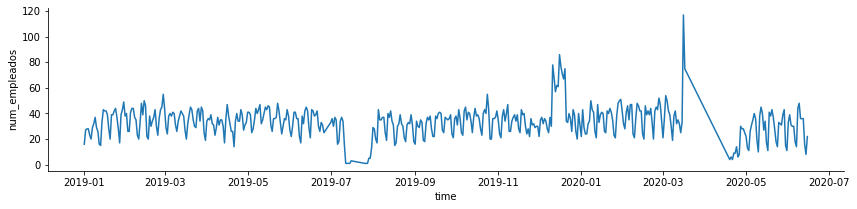

In [42]:
# Gráfico de la evolución del número de empleados de mantenimiento (que realizan movimientos) por día y hora
sns.relplot(data= empleados, x= "time", y="num_empleados", kind="line", height=3, aspect=4)
plt.show()

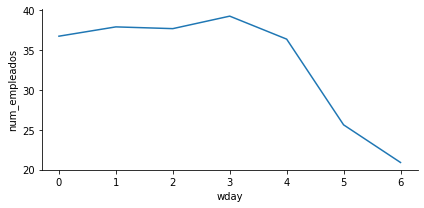

,wday,num_empleados
0,0,36.746479
1,1,37.915493
2,2,37.695652
3,3,39.264706
4,4,36.376812
5,5,25.611940
6,6,20.884058


In [43]:
# Se observa el número medio de empleados por día de la semana
empleados["wday"] = empleados["time"].dt.weekday
wday = empleados.groupby("wday")["num_empleados"].mean().reset_index()
sns.relplot(data= wday, x= "wday", y="num_empleados", kind="line", height=3, aspect=2)
plt.show()
wday

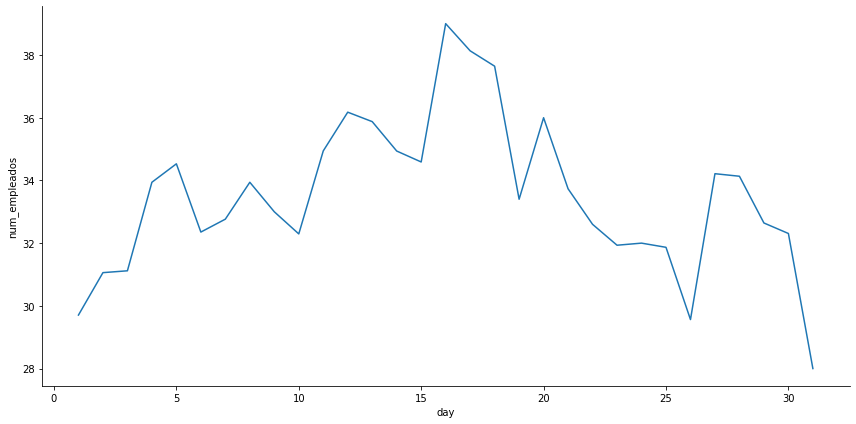

In [187]:
# Se observa el número medio de empleados por día del mes
day = empleados.groupby("day")["num_empleados"].mean().reset_index()
sns.relplot(data= day, x= "day", y="num_empleados", kind="line", height=6, aspect=2)
plt.show()

In [156]:
# Número de movimientos de los user 3 por día de la semana
movimientos_wday = df_u3.groupby(["wday", "day", "month", "year"])["_id"].count().reset_index()
movimientos_wday = movimientos_wday.rename(columns={"_id":"num_movimientos"})
media_wday = movimientos_wday.groupby(["wday"])["num_movimientos"].mean().reset_index()
media_wday.head()

,wday,num_movimientos
0,0,782.830986
1,1,787.464789
2,2,813.739130
3,3,833.102941
4,4,809.478261


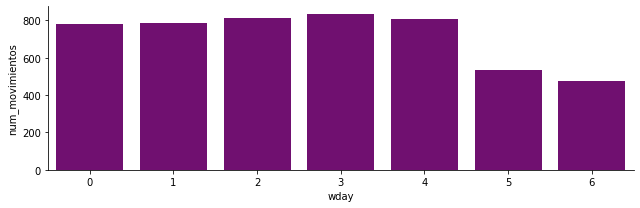

In [192]:
# Número medio de movimientos de los user 3 por día de la semana
# Day of the week
# 0 Monday
# 1 Tuesday
# 2 Wednesday
# 3 Thursday
# 4 Friday
# 5 Saturday
# 6 Sunday
sns.catplot(data=media_wday, x= "wday", y="num_movimientos", kind="bar", color='purple', aspect=3, height=3)
plt.show()

In [193]:
# Número medio de movimientos de los user 3 por día del mes
movimientos_diames = df_u3.groupby(["day", "month", "year"])["_id"].count().reset_index()
movimientos_diames = movimientos_diames.rename(columns={"_id":"num_movimientos"})
media_diames = movimientos_diames.groupby(["day"])["num_movimientos"].mean().reset_index()
media_diames.head()

,day,num_movimientos
0,1,646.882353
1,2,761.882353
2,3,704.294118
3,4,720.705882
4,5,725.764706


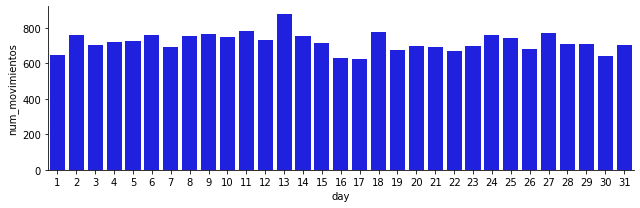

In [194]:
# Gráfico del número medio de movimientos de los user 3 por día del mes
sns.catplot(data=media_diames, x= "day", y="num_movimientos", kind="bar", color='blue', aspect=3, height=3)
plt.show()
# No se aprecian diferencias entre los movimientos generales y los de usuarios de mantenimiento

In [195]:
# Número medio de movimientos de los user 3 por hora
movimientos_hora = df_u3.groupby(["hour", "day", "month", "year"])["_id"].count().reset_index()
movimientos_hora = movimientos_hora.rename(columns={"_id":"num_movimientos"})
media_hora = movimientos_hora.groupby(["hour"])["num_movimientos"].mean().reset_index()
media_hora.head()

,hour,num_movimientos
0,0,31.524664
1,1,28.074592
2,2,20.054374
3,3,10.708709
4,4,10.376900


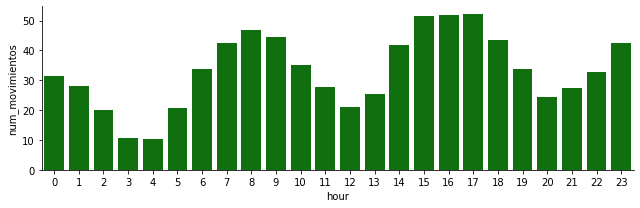

In [196]:
sns.catplot(data=media_hora, x= "hour", y="num_movimientos", kind="bar", color='green', aspect=3, height=3)
plt.show()

In [197]:
print("Tiempo medio a las 8h:", df_u3_filtrada[df_u3_filtrada["hour"]==8]["travel_time"].mean(), "segundos")
print("Tiempo medio a las 16h:", df_u3_filtrada[df_u3_filtrada["hour"]==16]["travel_time"].mean(), "segundos")
print("Tiempo medio a las 23h:", df_u3_filtrada[df_u3_filtrada["hour"]==23]["travel_time"].mean(), "segundos")

Tiempo medio a las 8h: 1957.189825568156 segundos
Tiempo medio a las 16h: 1958.529607313526 segundos
Tiempo medio a las 23h: 2994.9447898400554 segundos


In [198]:
# En al análisis por hora sí que se aprecian diferencias entre los movimientos generales y los de los usuarios de mantenimiento.
# Mientras que en los movimientos generales se aprecian dos picos de uso (8h y 18h), en los de mantenimiento se observan 3 picos
# claros de uso (8h, 16h, 23h)

In [200]:
# Creo una tabla "origen_user" para ver cuántos viajes ha realizado por estación de origen cada tipo de usuario
origen_user = df_full.pivot_table(values="_id", index="idunplug_station", columns="user_type", aggfunc='count').reset_index()
origen_user = origen_user.rename(columns={1:"User1", 2:"User2", 3:"User3"})
origen_user.head()
origen_user = origen_user.fillna(0)

In [201]:
origen_user.columns

Index(['idunplug_station', 'User1', 'User2', 'User3'], dtype='object', name='user_type')

In [ ]:
# A continuación se muestra de manera visual el número de movimientos por estación de origen de los usuarios 1, 2 y 3

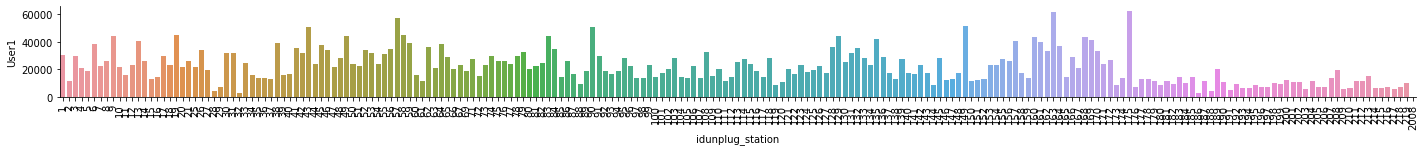

In [53]:
# Número de viajes de los user 1 por estación de origen
sns.catplot(data=origen_user, x="idunplug_station", y="User1", kind='bar', height=2, aspect=10)
plt.xticks(rotation=90)
plt.show()

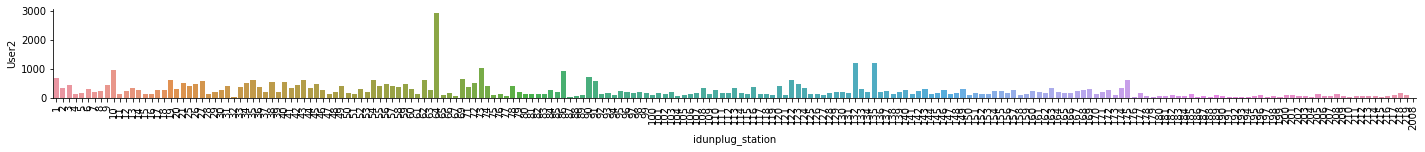

In [54]:
# Número de viajes de los user 2 por estación de origen
sns.catplot(data=origen_user, x="idunplug_station", y="User2", kind='bar', height=2, aspect=10)
plt.xticks(rotation=90)
plt.show()

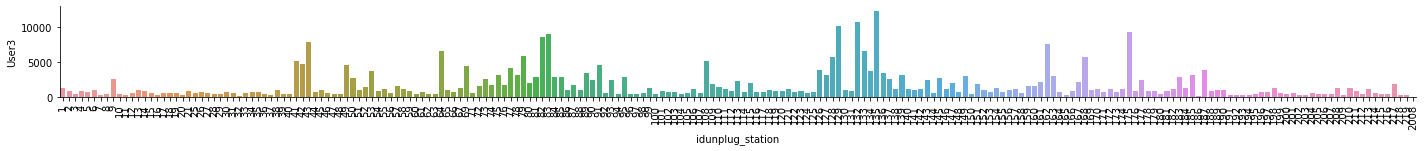

In [55]:
# Númerode viajes de user 3 por estación de origen
sns.catplot(data=origen_user, x="idunplug_station", y="User3", kind='bar', height=2, aspect=10)
plt.xticks(rotation=90)
plt.show()

In [56]:
# Tabla de origen_user en la que se incorporan proporciones para tratar de ver posibles relaciones
origen_user["Total"] = origen_user["User1"] + origen_user["User2"] + origen_user["User3"]
origen_user["3Prop"] = origen_user["User3"] / origen_user["Total"]
origen_user["1Prop"] = origen_user["User1"] / origen_user["Total"]
origen_user

user_type,idunplug_station,User1,User2,User3,Total,3Prop,1Prop
0,1,30405.0,698.0,1266.0,32369.0,0.039111,0.939325
1,2,11605.0,337.0,875.0,12817.0,0.068269,0.905438
2,3,29565.0,439.0,404.0,30408.0,0.013286,0.972277
3,4,21065.0,141.0,751.0,21957.0,0.034203,0.959375
4,5,18375.0,148.0,662.0,19185.0,0.034506,0.957780
...,...,...,...,...,...,...,...
210,216,7006.0,76.0,432.0,7514.0,0.057493,0.932393
211,217,5553.0,104.0,1773.0,7430.0,0.238627,0.747376
212,218,7368.0,156.0,299.0,7823.0,0.038221,0.941838
213,219,10254.0,107.0,242.0,10603.0,0.022824,0.967085


In [57]:
origen_user[origen_user["3Prop"] == origen_user["3Prop"].max()]
# Con esto vemos que la estación de origen con mayor proporción de movimientos de los usuarios de mantenimiento es la 82
# con el 25% de los movimientos

user_type,idunplug_station,User1,User2,User3,Total,3Prop,1Prop
76,82,24581.0,140.0,8492.0,33213.0,0.255683,0.740102


In [58]:
origen_user[origen_user["1Prop"] == origen_user["1Prop"].min()]
# Observamos, como era posible intuir, que la estación con mayor proporción de salidas de los usuarios de matenimiento
# es la misma que menor proporción de salidas registra entre los usuarios estándar

user_type,idunplug_station,User1,User2,User3,Total,3Prop,1Prop
76,82,24581.0,140.0,8492.0,33213.0,0.255683,0.740102


In [205]:
# Se crea una tabla "destino_user" para ver cuántos viajes ha realizado por estación de destino cada tipo de usuario
destino_user = df_full.pivot_table(values="_id", index="idplug_station", columns="user_type", aggfunc='count').reset_index()
destino_user = destino_user.rename(columns={1:"User1", 2:"User2", 3:"User3"})
destino_user.head()
destino_user = destino_user.fillna(0)

In [207]:
destino_user.columns

Index(['idplug_station', 'User1', 'User2', 'User3'], dtype='object', name='user_type')

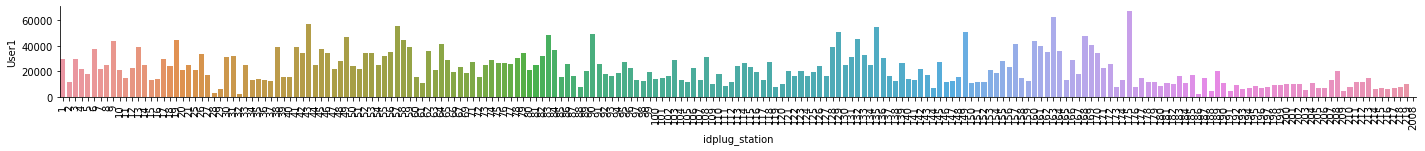

In [210]:
# Número de viajes de los user 1 por estación de destino
sns.catplot(data=destino_user, x="idplug_station", y="User1", kind='bar', height=2, aspect=10)
plt.xticks(rotation=90)
plt.show()

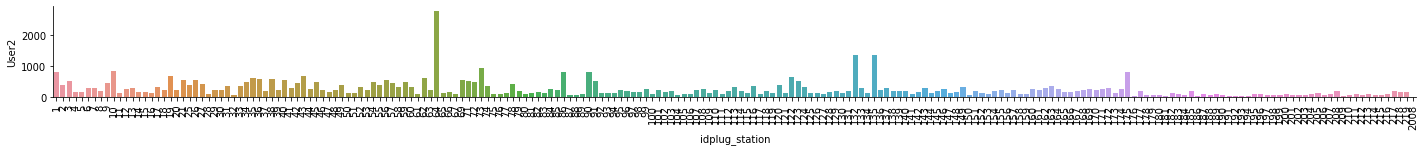

In [211]:
# Número de viajes de los user 2 por estación de origen
sns.catplot(data=destino_user, x="idplug_station", y="User2", kind='bar', height=2, aspect=10)
plt.xticks(rotation=90)
plt.show()

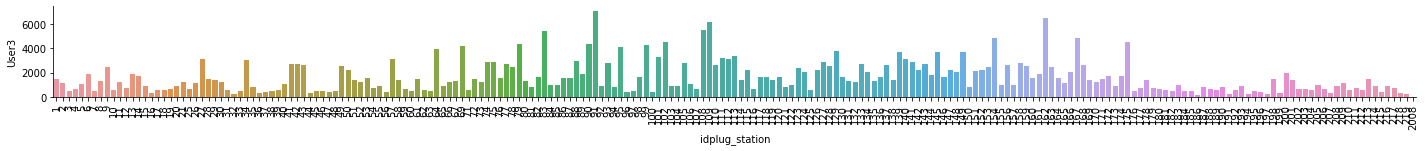

In [212]:
# Númerode viajes de user 3 por estación de origen
sns.catplot(data=destino_user, x="idplug_station", y="User3", kind='bar', height=2, aspect=10)
plt.xticks(rotation=90)
plt.show()

In [218]:
# Simplemente una comprobación...
print(origen_user["User3"].sum())
print(destino_user["User3"].sum())

349020.0
349020.0


In [219]:
destino_user["Total"] = destino_user["User1"] + destino_user["User2"] + destino_user["User3"]
destino_user["3Prop"] = destino_user["User3"] / destino_user["Total"]
destino_user["1Prop"] = destino_user["User1"] / destino_user["Total"]
destino_user

user_type,idplug_station,User1,User2,User3,Total,3Prop,1Prop
0,1,29889.0,805.0,1487.0,32181.0,0.046207,0.928778
1,2,11257.0,373.0,1178.0,12808.0,0.091974,0.878904
2,3,29475.0,519.0,471.0,30465.0,0.015460,0.967504
3,4,21519.0,163.0,611.0,22293.0,0.027408,0.965281
4,5,17624.0,143.0,1050.0,18817.0,0.055801,0.936600
...,...,...,...,...,...,...,...
210,216,6402.0,82.0,872.0,7356.0,0.118543,0.870310
211,217,6587.0,175.0,695.0,7457.0,0.093201,0.883331
212,218,7399.0,167.0,345.0,7911.0,0.043610,0.935280
213,219,10383.0,140.0,248.0,10771.0,0.023025,0.963977


In [261]:
# Se analizan los viajes y el tiempo medio de las rutas que realizan los usuarios de mantenimiento
# Creo tabla de tiempo medio de las rutas
time_rutas = df_u3_filtrada.groupby(["idunplug_station", "idplug_station"])["travel_time"].mean().reset_index()
time_rutas.head()

,idunplug_station,idplug_station,travel_time
0,1,1,30.104326
1,1,2,748.047619
2,1,5,3237.833333
3,1,6,4051.000000
4,1,7,623.000000


In [262]:
time_rutas.shape

(15958, 3)

In [263]:
# Creo tabla de número de viajes de las rutas
moves_rutas = df_u3_filtrada.groupby(["idunplug_station", "idplug_station"])["_id"].count().reset_index()
moves_rutas = moves_rutas.rename(columns={"_id":"num_movimientos"})
moves_rutas.head()

,idunplug_station,idplug_station,num_movimientos
0,1,1,393
1,1,2,21
2,1,5,12
3,1,6,2
4,1,7,2


In [264]:
moves_rutas.shape

(15958, 3)

In [281]:
# Uno las tablas anteriores
u3_rutas = pd.merge(moves_rutas, time_rutas, on=["idunplug_station", "idplug_station"], how="left")
u3_rutas.head()

,idunplug_station,idplug_station,num_movimientos,travel_time
0,1,1,393,30.104326
1,1,2,21,748.047619
2,1,5,12,3237.833333
3,1,6,2,4051.000000
4,1,7,2,623.000000


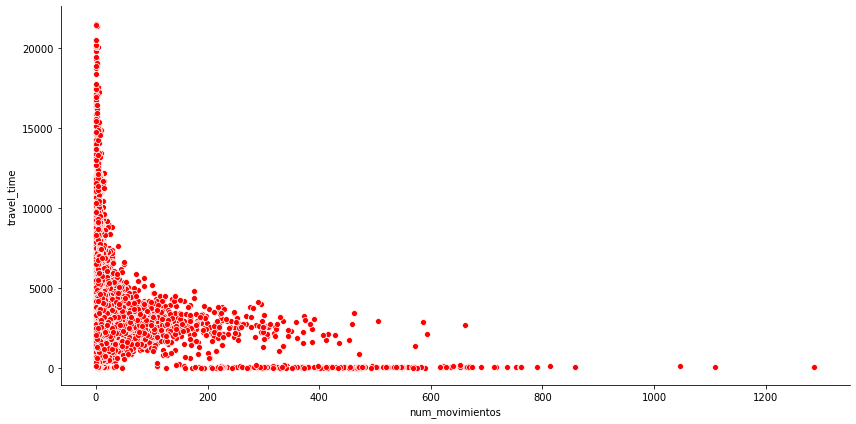

In [226]:
# Se crea un gráfico para evaluar la relación entre el número de viajes y el tiempo medio de las rutas realizadas por los
# usuarios de mantenimiento
sns.relplot(data=u3_rutas, x="num_movimientos", y="travel_time", kind="scatter", color="red", height=6, aspect=2)
plt.show()

In [266]:
print(u3_rutas["num_movimientos"].mean())
print(u3_rutas["travel_time"].mean())

21.67032209550069
3015.5497365811802


In [74]:
# Se observan las 15 rutas con mayor número de movimientos
u3_rutas.nlargest(15, columns="num_movimientos")

,idunplug_station,idplug_station,num_movimientos,travel_time
5298,83,83,1286,39.898134
13320,175,175,1109,79.486925
9769,135,135,1046,117.151052
1807,43,43,858,36.847319
9293,132,132,814,113.836609
9464,133,133,791,36.474083
15716,213,213,762,68.286089
8997,129,129,761,72.846255
5125,82,82,759,22.938076
285,6,6,752,37.436170


In [ ]:
# Podemos afirmar que estos movimientos no son desplazamientos como tal, si no que más bien se trata de una labor de revisión o
# recolocación de las bicicletas, pues se trata de movimientos que duran en su mayoría menos de 1 minuto.

In [75]:
# Estas gestiones de revisión/recolocación suponen el 26,4% del total de movimientos
u3_rutas[u3_rutas["idunplug_station"] == u3_rutas["idplug_station"]]["num_movimientos"].sum() / u3_rutas["num_movimientos"].sum() * 100

26.390121885979497

In [76]:
u3_rutas.nsmallest(15, columns="num_movimientos")

,idunplug_station,idplug_station,num_movimientos,travel_time
9,1,12,1,2476.0
11,1,20,1,3072.0
13,1,25,1,282.0
14,1,26,1,724.0
24,1,46,1,280.0
27,1,51,1,4775.0
31,1,56,1,152.0
35,1,64,1,2243.0
38,1,69,1,2177.0
42,1,81,1,768.0


In [77]:
# Las rutas con un solo movimiento suponen el 12% del total de movimientos
len(u3_rutas[u3_rutas["num_movimientos"]==1]) / len(u3_rutas) * 100

12.131846096002006

In [78]:
u3_rutas.nlargest(15, columns="travel_time")

,idunplug_station,idplug_station,num_movimientos,travel_time
8875,128,163,1,21558.00
12527,167,104,1,21486.00
585,13,148,2,21395.00
13708,179,217,1,20533.00
6727,99,51,1,20457.00
10012,137,72,1,20190.00
8802,128,75,1,20169.00
1234,35,154,4,20112.75
3860,72,100,1,20090.00
566,13,99,1,19849.00


In [228]:
# Tabla con evolutivo de movimientos de los user 3
u3_moves = df_u3_filtrada.groupby(["year", "month", "day"])["_id"].count().reset_index()
u3_moves.sort_values(by=["year", "month", "day"])

,year,month,day,_id
0,2019,1,1,394
1,2019,1,2,600
2,2019,1,3,622
3,2019,1,4,500
4,2019,1,5,405
...,...,...,...,...
473,2020,6,11,909
474,2020,6,12,1011
475,2020,6,13,351
476,2020,6,14,376


In [230]:
# Distribución de la variable de movimientos diarios de los trabajadores de BiciMAD
u3_moves._id.describe()

count     478.000000
mean      723.462343
std       283.413954
min         4.000000
25%       556.000000
50%       743.500000
75%       894.750000
max      2488.000000
Name: _id, dtype: float64

In [284]:
u3_time = df_u3_filtrada.groupby(["year", "month", "day"])["travel_time"].mean().reset_index()
u3_time.sort_values(by=["year", "month", "day"]).head()

,year,month,day,travel_time
0,2019,1,1,2366.159898
1,2019,1,2,1903.216667
2,2019,1,3,2189.327974
3,2019,1,4,2725.478000
4,2019,1,5,2433.412346


In [285]:
u3_evol = pd.merge(u3_moves, u3_time, on=["year", "month", "day"], how="left")
u3_evol.head()

,year,month,day,_id,travel_time
0,2019,1,1,394,2366.159898
1,2019,1,2,600,1903.216667
2,2019,1,3,622,2189.327974
3,2019,1,4,500,2725.478000
4,2019,1,5,405,2433.412346


In [286]:
u3_evol["date"] = u3_evol["day"].map(str) + '-' + u3_evol["month"].map(str) + '-' + u3_evol["year"].map(str)
u3_evol["date"] = pd.to_datetime(u3_evol["date"])
print(u3_evol.dtypes)

year                    int64
month                   int64
day                     int64
_id                     int64
travel_time           float64
date           datetime64[ns]
dtype: object


In [287]:
u3_evol= u3_evol.rename(columns={"_id":"num_movimientos"})
u3_evol

,year,month,day,num_movimientos,travel_time,date
0,2019,1,1,394,2366.159898,2019-01-01
1,2019,1,2,600,1903.216667,2019-02-01
2,2019,1,3,622,2189.327974,2019-03-01
3,2019,1,4,500,2725.478000,2019-04-01
4,2019,1,5,405,2433.412346,2019-05-01
...,...,...,...,...,...,...
473,2020,6,11,909,1589.719472,2020-11-06
474,2020,6,12,1011,1426.694362,2020-12-06
475,2020,6,13,351,948.099715,2020-06-13
476,2020,6,14,376,973.058511,2020-06-14


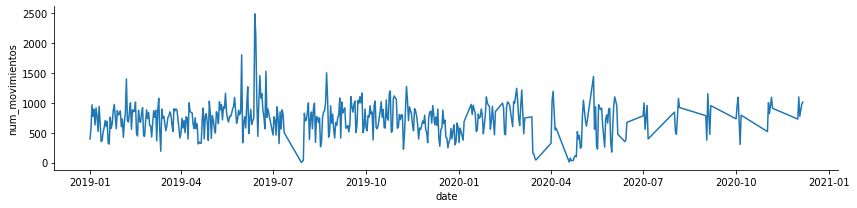

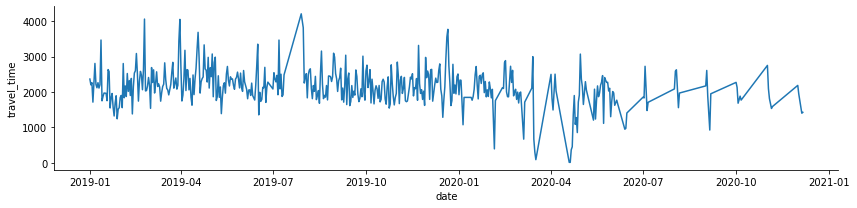

In [288]:
# Evolución del número de movimientos y la duración media
sns.relplot(data= u3_evol, x="date", y="num_movimientos", kind='line', height=3, aspect=4)
sns.relplot(data= u3_evol, x="date", y="travel_time", kind='line', height=3, aspect=4)
plt.show()

# AMPLIACIÓN DEL ANÁLISIS

In [ ]:
# En búsqueda de más patrones sobre los movimientos, exploro datos de las rutas entre los distintos tipos de usuarios

In [232]:
# Se crea una tabla para analizar las rutas realizadas en todo el período por cada tipo de usuario.
moves_users = df_full.pivot_table(values="_id", index=["idunplug_station", "idplug_station"], columns="user_type", 
                                  aggfunc='count').reset_index()
moves_users = moves_users.rename(columns={1:"User1", 2:"User2", 3:"User3"})
moves_users = moves_users.fillna(0)
moves_users
# Esta tabla contiene la información que antes se ha presentado gráficamente para cada usuario

user_type,idunplug_station,idplug_station,User1,User2,User3
0,1,1,455.0,56.0,397.0
1,1,2,70.0,12.0,21.0
2,1,3,105.0,3.0,0.0
3,1,4,39.0,1.0,0.0
4,1,5,59.0,0.0,12.0
...,...,...,...,...,...
45656,219,216,6.0,0.0,0.0
45657,219,217,13.0,0.0,0.0
45658,219,218,41.0,10.0,1.0
45659,219,219,287.0,15.0,223.0


In [233]:
moves_users.nlargest(5, columns="User3")

user_type,idunplug_station,idplug_station,User1,User2,User3
16526,83,83,1098.0,16.0,1289.0
36260,175,175,1896.0,148.0,1109.0
27680,135,135,2350.0,226.0,1048.0
8362,43,43,1804.0,39.0,861.0
27035,132,132,2178.0,404.0,816.0


In [234]:
moves_users.nlargest(5, columns="User1")

user_type,idunplug_station,idplug_station,User1,User2,User3
1854,9,149,3339.0,15.0,129.0
1075,6,6,2794.0,10.0,753.0
27680,135,135,2350.0,226.0,1048.0
27035,132,132,2178.0,404.0,816.0
30549,149,9,2093.0,4.0,17.0


In [237]:
# Se crea una tabla para analizar las rutas realizadas en todo el período por cada tipo de usuario.
time_users = df_full.pivot_table(values="travel_time", index=["idunplug_station", "idplug_station"], columns="user_type", 
                                  aggfunc='mean').reset_index()
time_users = time_users.rename(columns={1:"User1", 2:"User2", 3:"User3"})
time_users = time_users.fillna(0)
time_users
# Esta tabla contiene la información que antes se ha presentado gráficamente para cada usuario

user_type,idunplug_station,idplug_station,User1,User2,User3
0,1,1,2863.290110,4365.785714,424.327456
1,1,2,2317.900000,6970.500000,748.047619
2,1,3,986.028571,4227.333333,0.000000
3,1,4,1346.666667,737.000000,0.000000
4,1,5,967.847458,0.000000,3237.833333
...,...,...,...,...,...
45656,219,216,1520.333333,0.000000,0.000000
45657,219,217,1731.307692,0.000000,0.000000
45658,219,218,1909.292683,3305.200000,126.000000
45659,219,219,3133.404181,2708.000000,12.215247


In [250]:
users_rutas = pd.merge(moves_users, time_users, on=["idunplug_station", "idplug_station"], how="left")
users_rutas.head()

user_type,idunplug_station,idplug_station,User1_x,User2_x,User3_x,User1_y,User2_y,User3_y
0,1,1,455.0,56.0,397.0,2863.290110,4365.785714,424.327456
1,1,2,70.0,12.0,21.0,2317.900000,6970.500000,748.047619
2,1,3,105.0,3.0,0.0,986.028571,4227.333333,0.000000
3,1,4,39.0,1.0,0.0,1346.666667,737.000000,0.000000
4,1,5,59.0,0.0,12.0,967.847458,0.000000,3237.833333


In [251]:
users_rutas.shape

(45661, 8)

In [252]:
users_rutas_filtrada = users_rutas[users_rutas["User3_y"] < 21600 ]
users_rutas_filtrada.head()

user_type,idunplug_station,idplug_station,User1_x,User2_x,User3_x,User1_y,User2_y,User3_y
0,1,1,455.0,56.0,397.0,2863.290110,4365.785714,424.327456
1,1,2,70.0,12.0,21.0,2317.900000,6970.500000,748.047619
2,1,3,105.0,3.0,0.0,986.028571,4227.333333,0.000000
3,1,4,39.0,1.0,0.0,1346.666667,737.000000,0.000000
4,1,5,59.0,0.0,12.0,967.847458,0.000000,3237.833333


In [253]:
users_rutas_filtrada.shape

(44012, 8)

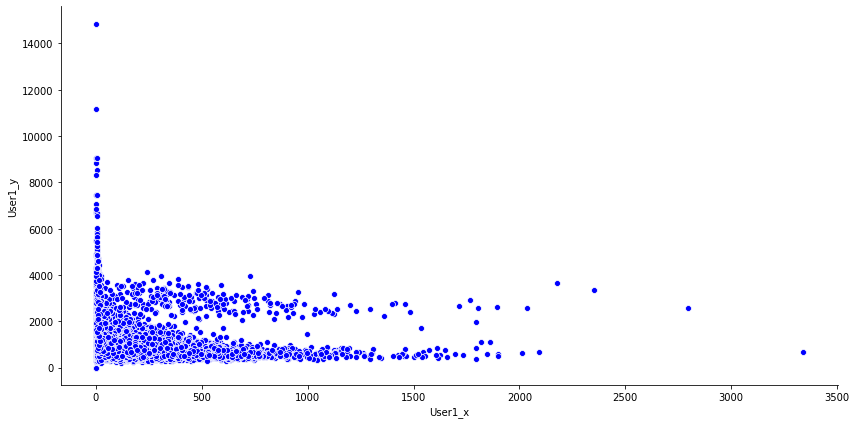

In [258]:
# User 1
sns.relplot(data=users_rutas_filtrada, x="User1_x", y="User1_y", kind="scatter", color="blue", height=6, aspect=2)
plt.show()

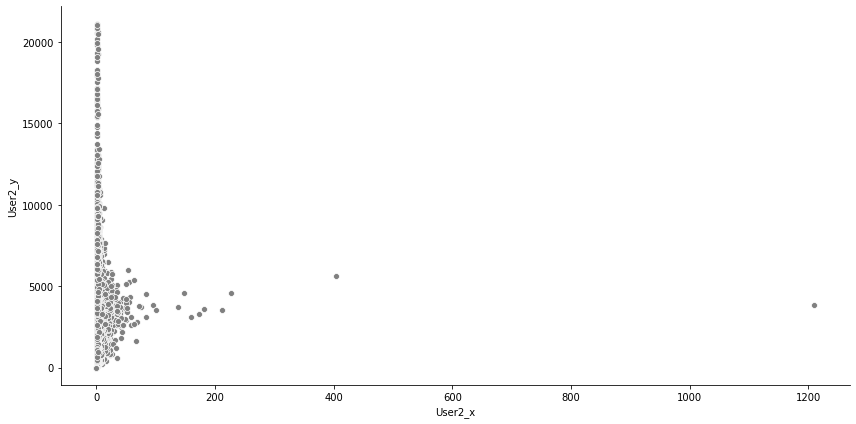

In [255]:
# User 2
sns.relplot(data=users_rutas_filtrada, x="User2_x", y="User2_y", kind="scatter", color="grey", height=6, aspect=2)
plt.show()

In [110]:
# Se obetiene el número total de movimientos diarios
media_diaria = df_full.groupby(["day", "month", "year"])["_id"].count().reset_index()
media_diaria = media_diaria.rename(columns={"_id":"num_movimientos"})
media_diaria.head()

,day,month,year,num_movimientos
0,1,1,2019,3509
1,1,1,2020,3363
2,1,2,2019,8013
3,1,2,2020,8783
4,1,3,2019,12983


In [112]:
# Se observa el comportamiento de la variable para tener una referencia de los movimientos que se realian diariamente
media_diaria["num_movimientos"].describe()

count      484.000000
mean     10459.061983
std       4631.258713
min          1.000000
25%       7761.000000
50%      10443.000000
75%      13273.750000
max      31935.000000
Name: num_movimientos, dtype: float64

In [ ]:
# La media de movimientos diarios totales de todos los usuarios de BiciMAD es de 10.500